https://www.renthop.com/

Classify into high, low, or medium

Mainly following https://www.kaggle.com/poonaml/two-sigma-connect-rental-listing-inquiries/two-sigma-renthop-eda

Introduction
* import libraries
* load data
* variable identification
* run statistical summaries
* correlation

Visualisation
* Univariate Analysis
* Bivariate Analysis

Feature Engineering

# Introduction

### Improt libraries and Load data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_json("./data/train.json")
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [3]:
test = pd.read_json('./data/test.json')
test.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",40.7109,7143442,-73.9571,0b9d5db96db8472d7aeb67c67338c4d2,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r
100000,2.0,2,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12 05:24:17,"~Take a stroll in Central Park, enjoy the ente...","Midtown West, 8th Ave","[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.7650,6860601,-73.9845,b5eda0eb31b042ce2124fd9e9fcfce2f,[https://photos.renthop.com/2/6860601_c96164d8...,4900,260 West 54th Street


### Variable Identification (?)

In [4]:
test.columns

Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'latitude', u'listing_id',
       u'longitude', u'manager_id', u'photos', u'price', u'street_address'],
      dtype='object')

In [5]:
train.columns

Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'interest_level', u'latitude',
       u'listing_id', u'longitude', u'manager_id', u'photos', u'price',
       u'street_address'],
      dtype='object')

In [6]:
print train.shape, test.shape

(49352, 15) (74659, 14)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [8]:
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [25]:
train.iloc[0,:]

bathrooms                                                        1.5
bedrooms                                                           3
building_id                         53a5b119ba8f7b61d4e010512e0dfc85
created                                          2016-06-24 07:54:24
description        A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
display_address                                  Metropolitan Avenue
features                                                          []
interest_level                                                medium
latitude                                                     40.7145
listing_id                                                   7211212
longitude                                                   -73.9425
manager_id                          5ba989232d0489da1b5f2c45f6688adc
photos             [https://photos.renthop.com/2/7211212_1ed4542e...
price                                                           3000
street_address                    

## Visualising Variables

* Target - interest_level
* Text data
  * description
  * display_address
  * street_address
  * features
* Numeric data
  * bathrooms
  * betrooms
  * latitude 
  * longitude
  * price
  * created
* IDs
  * building_id
  * listing_id
  * manager_id
* other data
  * photos

Making more numeric data -> Feature engineering!
* From text data
  * description -> # of word used in description
  * features -> # of features in feature list
* from numerice data
  * created -> week, date, time,,
* from IDs
  * building_id -> count
  * listing_id -> count
  * manager_id -> count
* from other data
  * photos -> count

Categorizing idea
* display_address
* street_address
* longitude
* latitude

Data cleaning
* based on price
* based on relation bt # of bathrooms and # of bedrooms

### Target - interest_level

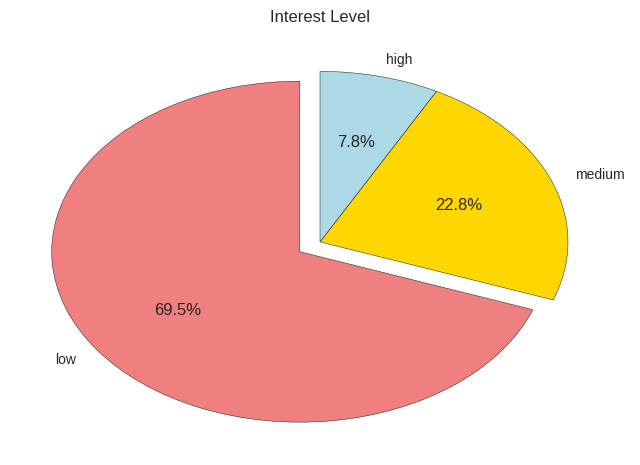

In [24]:
#target variable
labels = ["low","medium","high"]
sizes = train.interest_level.value_counts().values
explode=[0.1,0,0]
colors = ['lightcoral','gold','lightblue']
patches, texts, autotexts= plt.pie(sizes, labels=labels, colors=colors, explode=explode, \
                                  autopct="%1.1f%%", startangle=90)
plt.title("Interest Level")
plt.show()

### Text data

check unique() address

In [16]:
from wordcloud import WordCloud

In [10]:
#Preprocessing
text = ''
text_dispadd = ''
text_street = ''
text_desc =''

for ind, row in train.iterrows():
    for feature in row['features']:
        text = " ".join([text, "_".join(feature.strip().split(" "))])
    text_dispadd = " ".join([text_dispadd,"_".join(row['display_address'].strip().split(" "))])
    text_street = " ".join([text_street, row['street_address']])
    text_desc=" ".join([text_desc, row['description']])

text = text.strip()
text_dispadd = text_dispadd.strip()
text_street = text_street.strip()
text_desc = text_desc.strip()

KeyboardInterrupt: 

In [ ]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


# wordcloud for display address
plt.figure(figsize=(12,6))
wc = WordCloud(background_color='gold', width=600, height=300,
                      max_font_size=50, max_words=40).generate(text_dispadd)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
#plt.imshow(wc)
plt.title("Display Address", fontsize=20)
plt.axis("off")
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300,
                      max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Features", fontsize=20)
plt.axis("off")
plt.show()

In [ ]:
def green_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(165, 90%%, %d%%)" % random.randint(39, 145)


# wordcloud for street address
plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='seagreen', width=600, height=300,
                      max_font_size=50, max_words=40).generate(text_street)
wordcloud.recolor(color_func=green_color_func, random_state=8)
plt.imshow(wordcloud)
plt.title("Street Address", fontsize=20)
plt.axis("off")
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='black', width=600, height=300,
                      max_font_size=50, max_words=40).generate(text_desc)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Description", fontsize=20)
plt.axis("off")
plt.show()

## Numeric Data

* Univariate plot
* Bivariate plot with interest_level

### Price

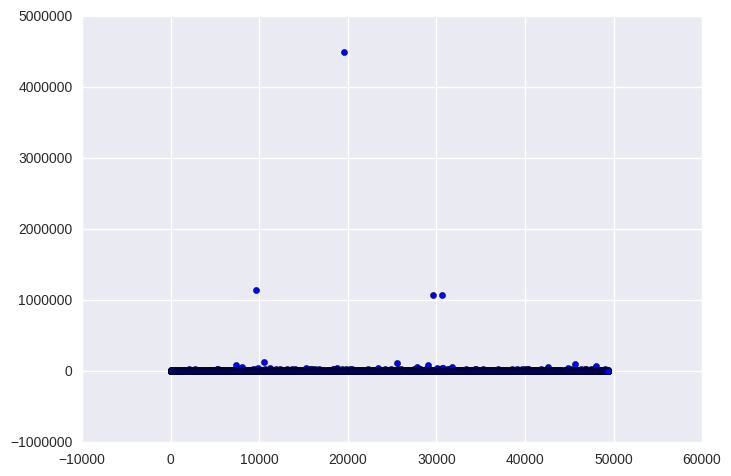

In [26]:
plt.scatter(range(train.shape[0]), train['price'].values)

개 outlier들이 4 집 정도 된다. 쟤들은 뭔지 보고 training할 때 제외할 필요성 있음.

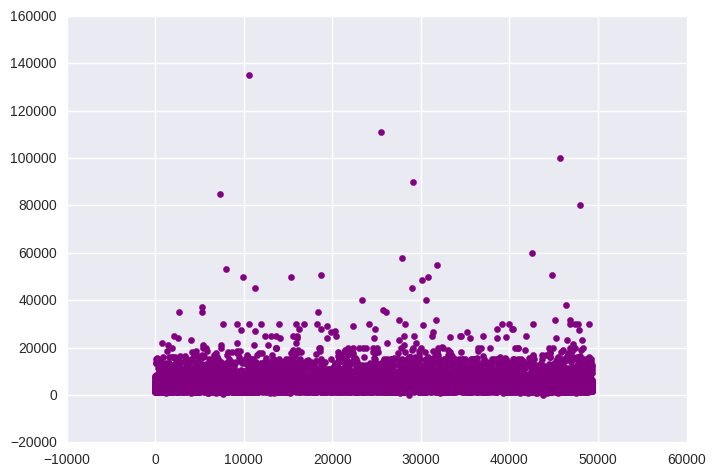

In [31]:
# remove outliers
tmp = train[train['price'] < 1000000]

plt.scatter(range(tmp.shape[0]), tmp['price'].values, color='purple')

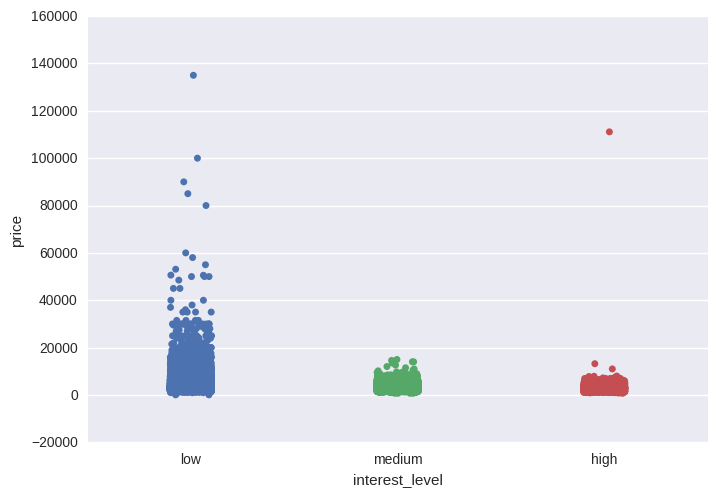

In [32]:
order = ['low', 'medium', 'high']
sns.stripplot(tmp["interest_level"], tmp["price"], jitter=True, order=order)

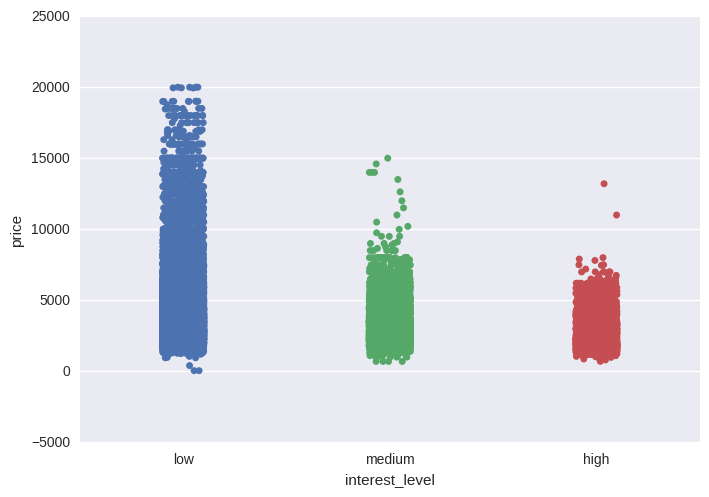

In [35]:
tmp = train[train['price'] < 20000]

sns.stripplot(tmp["interest_level"], tmp["price"], jitter=True, order=order)

Violin plot might be better. 

### Bathrooms

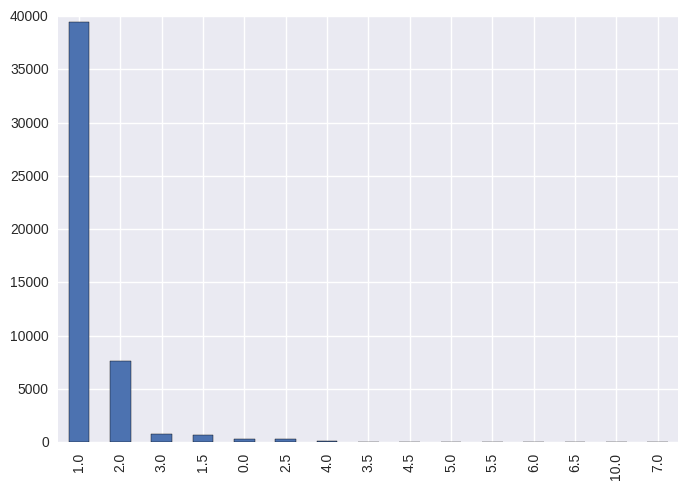

In [40]:
train['bathrooms'].value_counts().plot(kind='bar')

In [41]:
(train['bathrooms'].value_counts() / train.shape[0])

1.0     0.798792
2.0     0.155212
3.0     0.015096
1.5     0.013069
0.0     0.006342
2.5     0.005613
4.0     0.003222
3.5     0.001418
4.5     0.000588
5.0     0.000405
5.5     0.000101
6.0     0.000081
6.5     0.000020
10.0    0.000020
7.0     0.000020
Name: bathrooms, dtype: float64

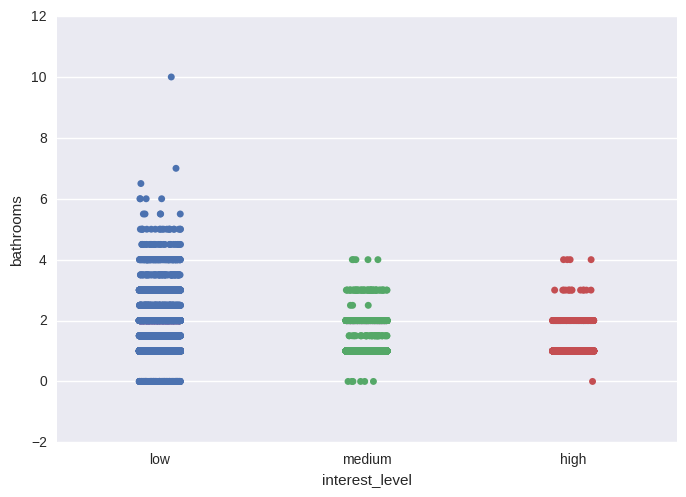

In [43]:
sns.stripplot(y="bathrooms", x="interest_level",data=train, jitter=True, order=order)

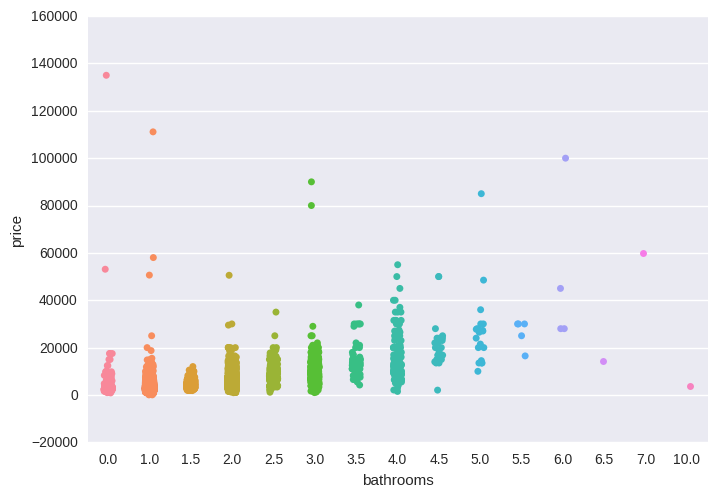

In [46]:
tmp = train[train['price'] < 1000000]
sns.stripplot(y="price", x="bathrooms",data=tmp, jitter=True)

화장실이 없는데 비싼 집은 뭐냐.ㅋㅋ + 화장실 10개짜리인데 가격이 저런 것도 웃낌.

### bedrooms

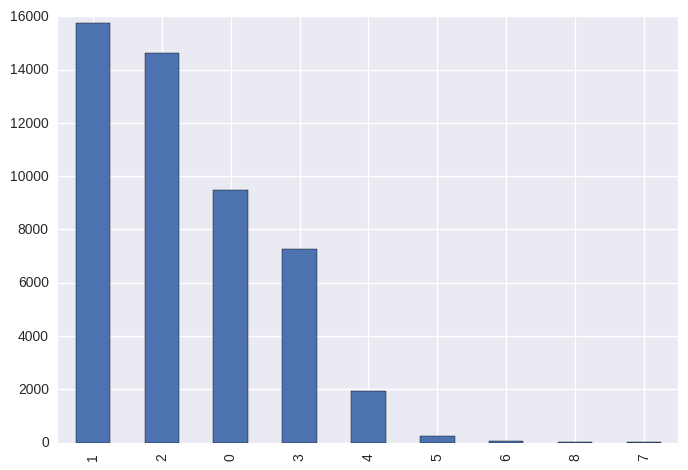

In [47]:
train['bedrooms'].value_counts().plot(kind='bar')

In [48]:
(train['bedrooms'].value_counts()/train.shape[0])

1    0.319177
2    0.296300
0    0.191988
3    0.147431
4    0.039087
5    0.005005
6    0.000932
8    0.000041
7    0.000041
Name: bedrooms, dtype: float64

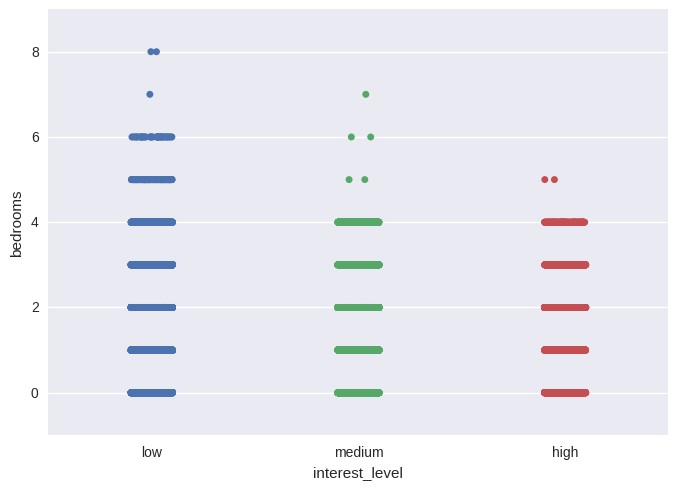

In [49]:
sns.stripplot(y="bedrooms", x="interest_level",data=train, jitter=True, order=order)

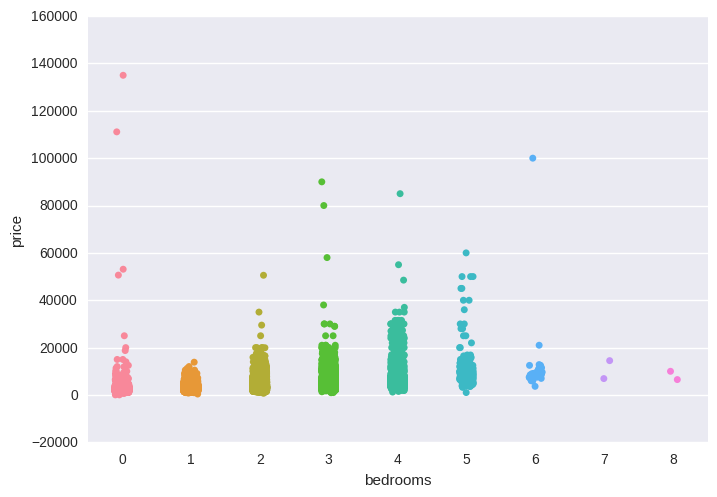

In [52]:
tmp = train[train['price'] < 1000000]

sns.stripplot(y="price", x="bedrooms",data=tmp, jitter=True)

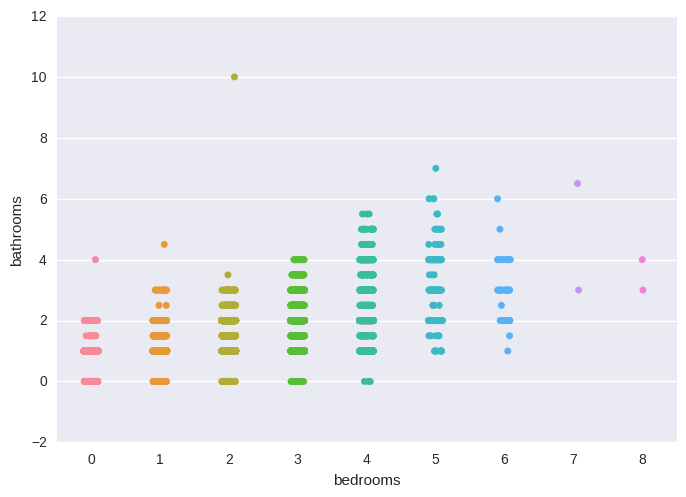

In [53]:
sns.stripplot(y="bathrooms", x="bedrooms",data=train, jitter=True)

화장실은 10개인데 침실은 2개임..ㅋㅋ. 화장실이 침실보다 많은 건 뭐임.;;

### Latitude & Longitude

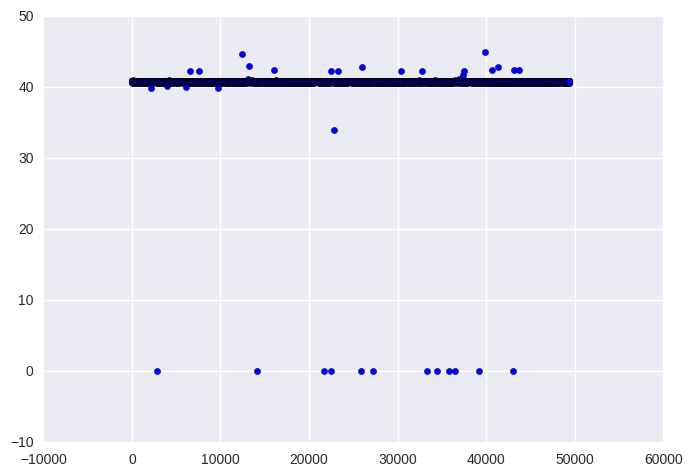

In [58]:
plt.scatter(range(train.shape[0]), train['latitude'])

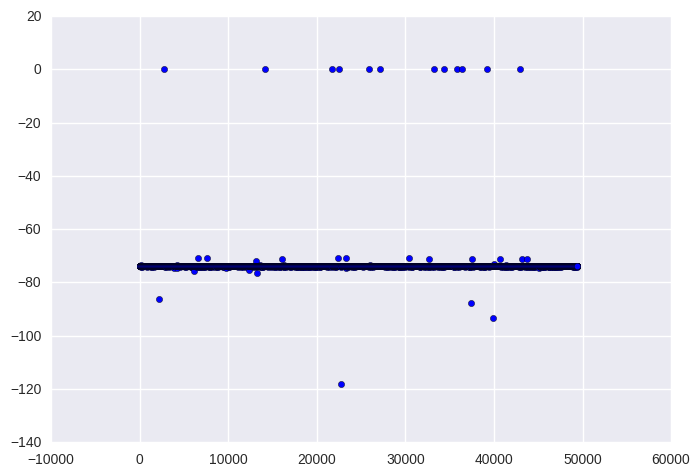

In [59]:
plt.scatter(range(train.shape[0]), train['longitude'])

위도&경도는 의미가 딱히 없는 듯.